<a href="https://colab.research.google.com/github/EddBr/ECS171-Final-Website/blob/main/ECS171_Group_31_Preprocessing_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import and print various dataset metadata:**

 Below this column are diagnostic tools for data precprocessing

In [2]:
# Install the ucimlrepo package
!pip install ucimlrepo


from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
obesity_data = fetch_ucirepo(id=544)

X = obesity_data.data.features
y = obesity_data.data.targets

# Print metadata and variables to understand the structure of the dataset
print(obesity_data.metadata)
print(obesity_data.variables)

# Create pandas DataFrames for features and target
df_X = pd.DataFrame(X, columns=obesity_data.feature_names)
df_y = pd.DataFrame(y, columns=['NObeyesdad'])  # Adjust this to the actual target variable name

# Combine features and target into a single DataFrame
df = pd.concat([df_X, df_y], axis=1)

# Display the first few rows of the DataFrame
display(df)

{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
"""
This code is for purely diagnostic purposes, it prints all the unique categorical values.
"""
categorical_features = [
    'Gender',
    'family_history_with_overweight',
    'FAVC',
    'FCVC',
    'NCP',
    'CAEC',
    'SMOKE',
    'CH2O',
    'SCC',
    'FAF',
    'TUE',
    'CALC',
    'MTRANS',
    'NObeyesdad'
]

# Loop through each categorical feature and print sorted unique values
for feature in categorical_features:
    sorted_unique_values = sorted(df[feature].unique())
    print(f"{feature}: {sorted_unique_values}")


Gender: ['Female', 'Male']
family_history_with_overweight: ['no', 'yes']
FAVC: ['no', 'yes']
FCVC: [1.0, 1.003566, 1.005578, 1.00876, 1.031149, 1.036159, 1.036414, 1.052699, 1.053534, 1.063449, 1.064162, 1.067909, 1.078529, 1.081585, 1.0816, 1.096455, 1.108663, 1.116068, 1.118436, 1.122127, 1.123672, 1.123939, 1.133844, 1.140615, 1.142468, 1.164062, 1.168856, 1.188089, 1.202075, 1.203754, 1.204855, 1.206276, 1.212908, 1.21498, 1.220024, 1.261288, 1.263216, 1.264234, 1.270448, 1.276858, 1.27785, 1.289315, 1.303878, 1.306844, 1.31415, 1.317729, 1.321028, 1.3307, 1.34138, 1.344854, 1.362441, 1.368978, 1.369529, 1.387489, 1.392665, 1.397468, 1.412566, 1.428289, 1.431346, 1.443674, 1.450218, 1.451337, 1.452524, 1.455602, 1.457758, 1.469384, 1.475906, 1.482722, 1.4925, 1.492834, 1.517912, 1.518966, 1.521604, 1.522001, 1.524428, 1.528331, 1.537505, 1.557287, 1.562804, 1.567101, 1.570089, 1.572036, 1.57223, 1.585183, 1.588114, 1.588782, 1.592183, 1.595746, 1.601236, 1.617093, 1.620845, 1.62436

In [4]:
"""
This code is for purely diagnostic purposes, it prints all missing rows if any
"""
import numpy as np
import pandas as pd

# Identify rows with missing values (NaN)
rows_with_nan = df[df.isnull().any(axis=1)]

# Identify rows with infinite values (Inf)
rows_with_inf = df[df.isin([np.inf, -np.inf]).any(axis=1)]

# Display the rows
print("Rows with NaN values:")
print(rows_with_nan)

print("\nRows with Inf values:")
print(rows_with_inf)

Rows with NaN values:
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []

Rows with Inf values:
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []


# **Feature engineering: Convert categorical/binary data to integers**

In [5]:
# Feature Engineering:
# Convert categorical variables to corresponding integers
# Cateogrical columns = ['Gender', 'CAEC', 'CALC', 'MTRANS', 'NObeyesdad']

gender_mapping = {
    'Female': 0,
    'Male': 1,
}
df['Gender'] = df['Gender'].map(gender_mapping)

caec_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
df['CAEC'] = df['CAEC'].map(caec_mapping)

calc_mapping = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always' : 3
}
df['CALC'] = df['CALC'].map(calc_mapping)

mtrans_mapping = {
    'Automobile': 0,
    'Motorbike': 1,
    'Bike': 2,
    'Public_Transportation': 3,
    'Walking': 4
}
df['MTRANS'] = df['MTRANS'].map(mtrans_mapping)

nobeyesdad_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I':2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I':4,
    'Obesity_Type_II':5,
    'Obesity_Type_III':6,
}
df['NObeyesdad'] = df['NObeyesdad'].map(nobeyesdad_mapping)

# Convert binary variables to corresponding 0 (false) and 1 (true)
# Binary columns = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
binary_mapping = {
    "no": 0,
    "yes": 1,
}
df['family_history_with_overweight'] = df['family_history_with_overweight'].map(binary_mapping)
df['FAVC'] = df['FAVC'].map(binary_mapping)
df['SMOKE'] = df['SMOKE'].map(binary_mapping)
df['SCC'] = df['SCC'].map(binary_mapping)

X = df[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]

y = df['NObeyesdad']

display(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,4,2
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,3,6
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,3,6
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,3,6
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,3,6


# **Data visualization: PDF for continuous data and frequency plots for categorical data**

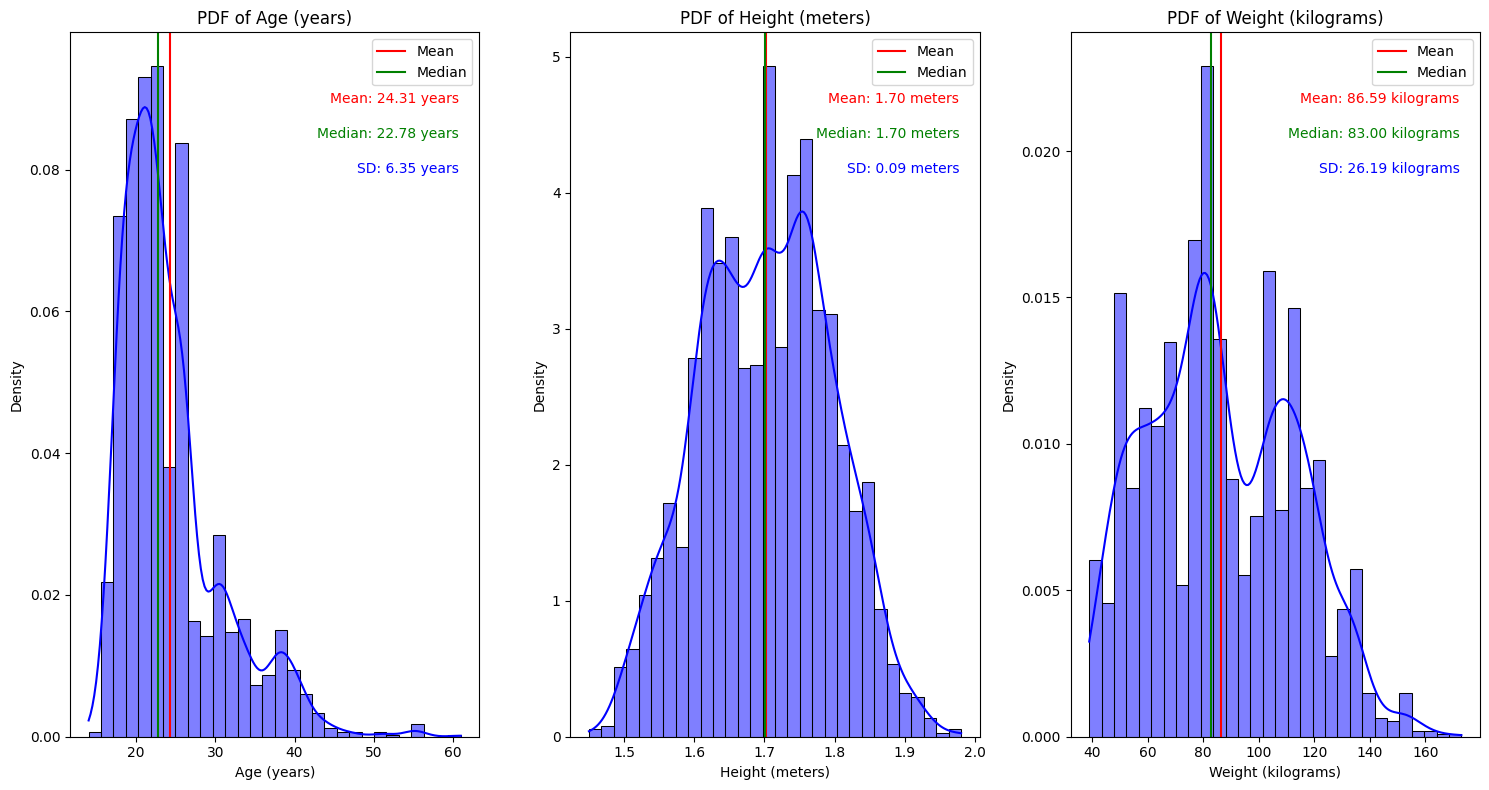

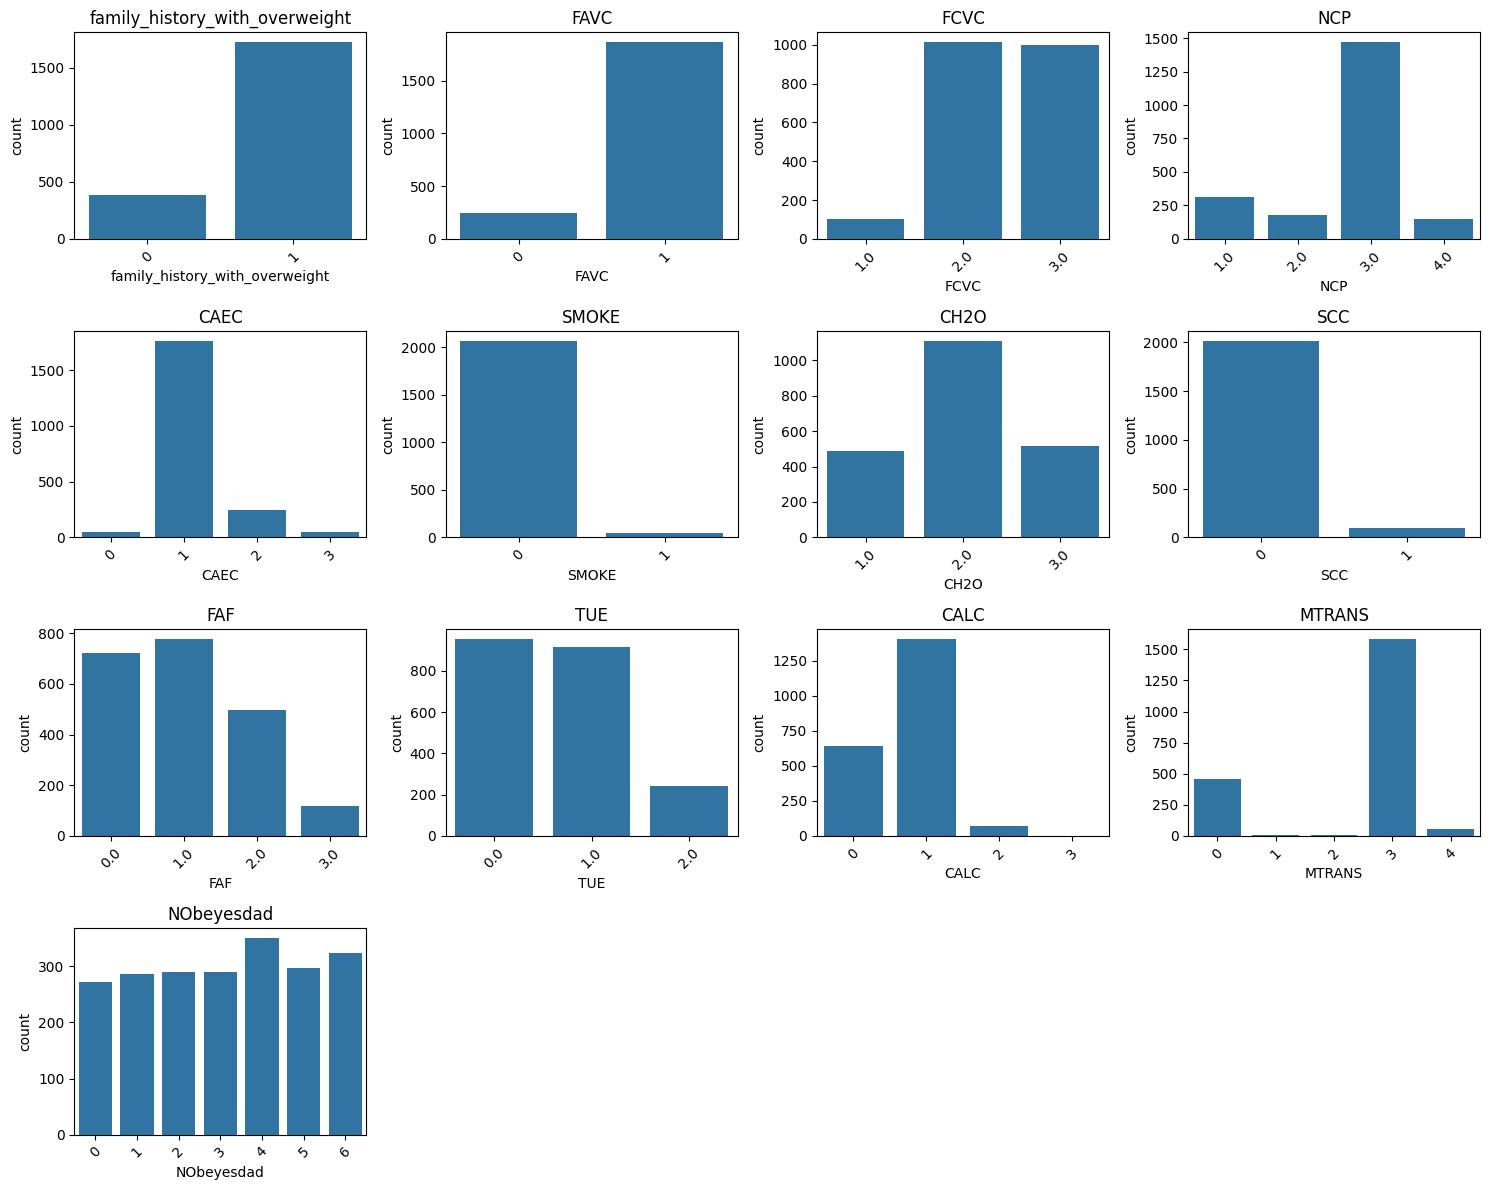

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1. Plot Continuous Features
continuous_features = ['Age', 'Height', 'Weight']
#Calculate mean, median, and sd for continuous features
stats = df[continuous_features].agg(['mean', 'median', 'std']).T
stats.columns = ['Mean', 'Median', 'Std']

# Define units for each feature
units = {
    'Age': 'years',
    'Height': 'meters',
    'Weight': 'kilograms'
}

# Plot continuous features
plt.figure(figsize=(15, 8))

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(1, len(continuous_features), i)
    sns.histplot(df[feature], kde=True, color='blue', bins=30, stat='density')
    plt.axvline(stats.loc[feature, 'Mean'], color='red', label='Mean')
    plt.axvline(stats.loc[feature, 'Median'], color='green', label='Median')

    # Stats in the top right corner
    plt.text(0.95, 0.90, f'Mean: {stats.loc[feature, "Mean"]:.2f} {units[feature]}', color='red', ha='right', fontsize=10, transform=plt.gca().transAxes)
    plt.text(0.95, 0.85, f'Median: {stats.loc[feature, "Median"]:.2f} {units[feature]}', color='green', ha='right', fontsize=10, transform=plt.gca().transAxes)
    plt.text(0.95, 0.80, f'SD: {stats.loc[feature, "Std"]:.2f} {units[feature]}', color='blue', ha='right', fontsize=10, transform=plt.gca().transAxes)

    plt.title(f'PDF of {feature} ({units[feature]})')
    plt.xlabel(f'{feature} ({units[feature]})')
    plt.legend()

plt.tight_layout()
plt.show()

#2. Plot Ceteogrical Features:
categorical_features = ['family_history_with_overweight', 'FAVC', 'FCVC', 'NCP','CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

#Some columns have aritifical data created using averages that have decimal values. That data needs to be temporarily rounded to provide clearer visualization
temp_df = df.copy()
temp_df[categorical_features] = temp_df[categorical_features].round()

#Visualizing frequency distribution of categorical features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)

    unique_values = temp_df[feature].dropna().unique()
    temp_df[feature] = pd.Categorical(temp_df[feature], categories=sorted(unique_values), ordered=True)

    sns.countplot(data=temp_df, x=feature, order=sorted(unique_values))
    plt.title(feature)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Continuous variables: Age, Height, and Weight

Ordinal variables, FCVC, NCP, CAEC, CH2O, FAF, TUE, and CALC

Nominal variables Gender, family_history_with_overweight, FAVC, SMOKE, SCC, MTRANS

In [7]:
#Continuous variables
continuous = ['Age', 'Height', 'Weight']

#Ordinal variables
ordinal = [
    'FCVC',   # Frequency of vegetable consumption
    'NCP',    # Number of daily main meals
    'CAEC',   # Eating between meals
    'CH2O',   # Daily water intake
    'FAF',    # Physical activity frequency
    'TUE',    # Time using electronic devices
    'CALC'    # Alcohol consumption frequency
]

#Nominal variables
nominal = [
    'Gender',                       # Gender
    'family_history_with_overweight',  # Family history of overweight
    'FAVC',                         # High caloric food consumption
    'SMOKE',                        # Smoking status
    'SCC',                          # Calorie monitoring
    'MTRANS'                        # Mode of transportation
]


# **Correlation Analysis:**

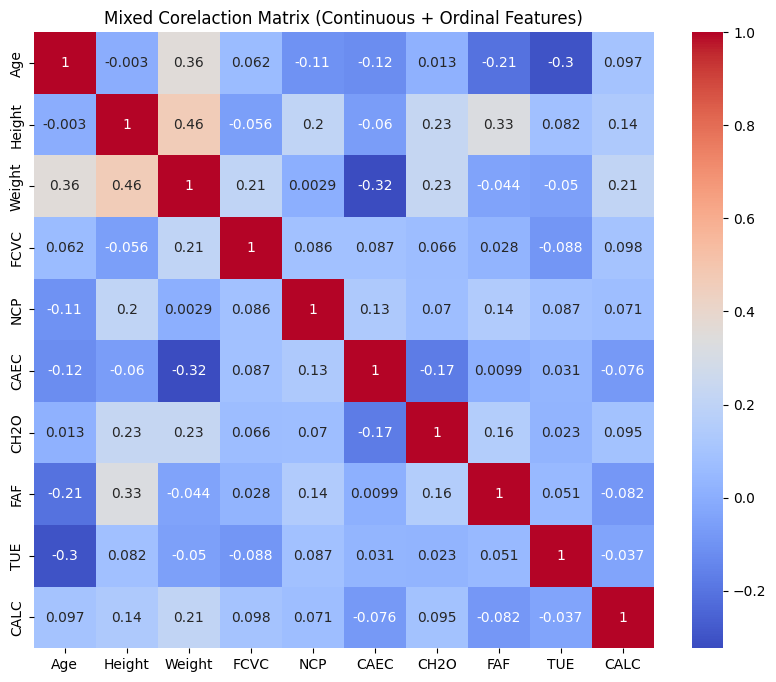

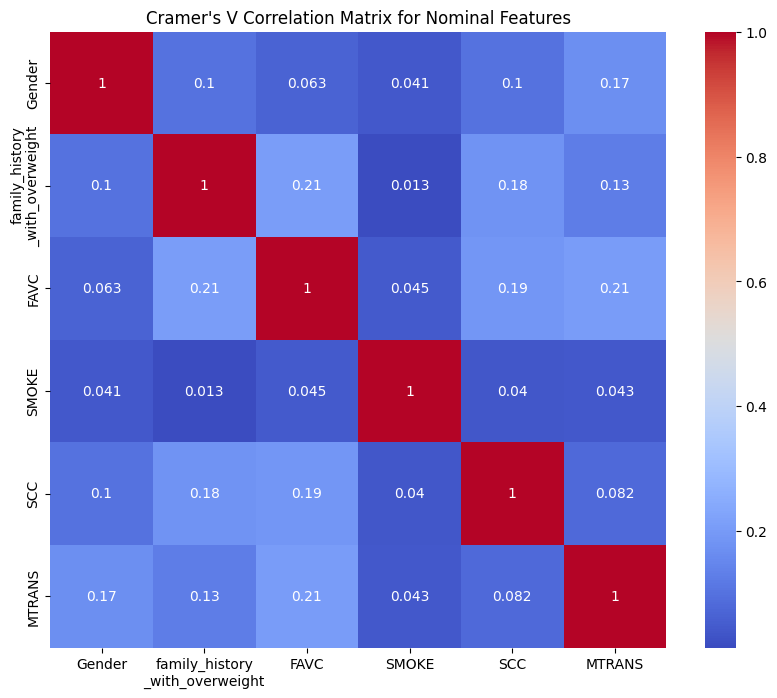

In [8]:
# Coorelation Analysis Steps:
# 1. Continuous and Nominal: Compute the correlation statistics (matrix, pairwise plots) to visualize pairs with high collinearity.
# F2. Categorical: Compute Chi-Square Test and specifically Cramer’s V
# Features with ∣V∣>0.3 may indicate extremely correlated features for removal, 0.1<|V|<0.3 should be monitored

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

#STEP 1:
method = "spearman"
continuous_and_ordinal = continuous + ordinal
df_continuous_and_ordinal = df[continuous_and_ordinal]
correlation_matrix = df_continuous_and_ordinal.corr(method=method)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Mixed Corelaction Matrix (Continuous + Ordinal Features)")
plt.show()

df.corr()

#sns.pairplot(df_continuous_and_ordinal, height=2)
#plt.show()

#STEP 2:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

#Calculate Cramer's V matrix
cramers_v_matrix = pd.DataFrame(
    np.zeros((len(nominal), len(nominal))),
    index=nominal,
    columns=nominal
)

#Fill in matrix
for col1 in nominal:
    for col2 in nominal:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
          cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_v_matrix = cramers_v_matrix.rename(
    index=lambda x: 'family_history\n_with_overweight' if x == 'family_history_with_overweight' else x,
    columns=lambda x: 'family_history\n_with_overweight' if x == 'family_history_with_overweight' else x
)

#Plot Cramer's V
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Cramer's V Correlation Matrix for Nominal Features")
plt.show()


# **Advanced Feature Engineering: One-hot encoding**
Prior to this point all the categorical features of the data has been lael encoded for simple data visualization. When plugging the data into the model, the nominal data needs to be one-hot encoded and the ordinal data needs to be label-encoded for feature engineering accuracy. Below is code to change nominal variables to one-hot encoded values.

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#Continuous variables
continuous = ['Age', 'Height', 'Weight']

#Ordinal variables: Needs to be label encoded
ordinal = [
    'FCVC',   # Frequency of vegetable consumption
    'NCP',    # Number of daily main meals
    'CAEC',   # Eating between meals
    'CH2O',   # Daily water intake
    'FAF',    # Physical activity frequency
    'TUE',    # Time using electronic devices
    'CALC'    # Alcohol consumption frequency
]

#Nominal variables:
nominal = [
    'Gender',                       # Gender
    'family_history_with_overweight',  # Family history of overweight
    'FAVC',                         # High caloric food consumption
    'SMOKE',                        # Smoking status
    'SCC',                          # Calorie monitoring
    'MTRANS'                        # Mode of transportation
]

#Nominal variable without binary variables: Label encoding has already taken care of the nominal variables, these remaining nominal variables are the ones that actually need to be one one hot encoded
nominal_binary_excluded= [
    #'Gender',                       # Gender
    'family_history_with_overweight',  # Family history of overweight
    #'FAVC',                         # High caloric food consumption
    #'SMOKE',                        # Smoking status
    #'SCC',                          # Calorie monitoring
    'MTRANS'                        # Mode of transportation
]

one_hot_encoder = OneHotEncoder(sparse_output=False)

#One hot encode nominal values of df
one_hot_encoded = one_hot_encoder.fit_transform(df[nominal_binary_excluded])

#Get column names based on original categories (if possible)
one_hot_columns = one_hot_encoder.get_feature_names_out(nominal_binary_excluded)

#Create a DataFrame with one-hot encoded values
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns, index=df.index)

#Drop original nominal columns and update df with one-hot encoded columns
df.drop(columns=nominal_binary_excluded, inplace=True)
df = df.join(one_hot_df)

print(df.head())



   Gender   Age  Height  Weight  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  ...  TUE  \
0       0  21.0    1.62    64.0     0   2.0  3.0     1      0   2.0  ...  1.0   
1       0  21.0    1.52    56.0     0   3.0  3.0     1      1   3.0  ...  0.0   
2       1  23.0    1.80    77.0     0   2.0  3.0     1      0   2.0  ...  1.0   
3       1  27.0    1.80    87.0     0   3.0  3.0     1      0   2.0  ...  0.0   
4       1  22.0    1.78    89.8     0   2.0  1.0     1      0   2.0  ...  0.0   

   CALC  NObeyesdad  family_history_with_overweight_0  \
0     0           1                               0.0   
1     1           1                               0.0   
2     2           1                               0.0   
3     2           2                               1.0   
4     1           3                               1.0   

   family_history_with_overweight_1  MTRANS_0  MTRANS_1  MTRANS_2  MTRANS_3  \
0                               1.0       0.0       0.0       0.0       1.0   
1           

# **Advanced Feature Engineering: One-hot encoding**

In [10]:
categorical_features = [
    'Gender',
    #'family_history_with_overweight',
    'FAVC',
    'FCVC',
    'NCP',
    'CAEC',
    'SMOKE',
    'CH2O',
    'SCC',
    'FAF',
    'TUE',
    'CALC',
    #'MTRANS',
    'NObeyesdad'
]

df[categorical_features] = df[categorical_features].round()

# Loop through each categorical feature and print sorted unique values
for feature in categorical_features:
    sorted_unique_values = sorted(df[feature].unique())
    print(f"{feature}: {sorted_unique_values}")


Gender: [0, 1]
FAVC: [0, 1]
FCVC: [1.0, 2.0, 3.0]
NCP: [1.0, 2.0, 3.0, 4.0]
CAEC: [0, 1, 2, 3]
SMOKE: [0, 1]
CH2O: [1.0, 2.0, 3.0]
SCC: [0, 1]
FAF: [0.0, 1.0, 2.0, 3.0]
TUE: [0.0, 1.0, 2.0]
CALC: [0, 1, 2, 3]
NObeyesdad: [0, 1, 2, 3, 4, 5, 6]


# **Transformation of data to remove skewedness:**

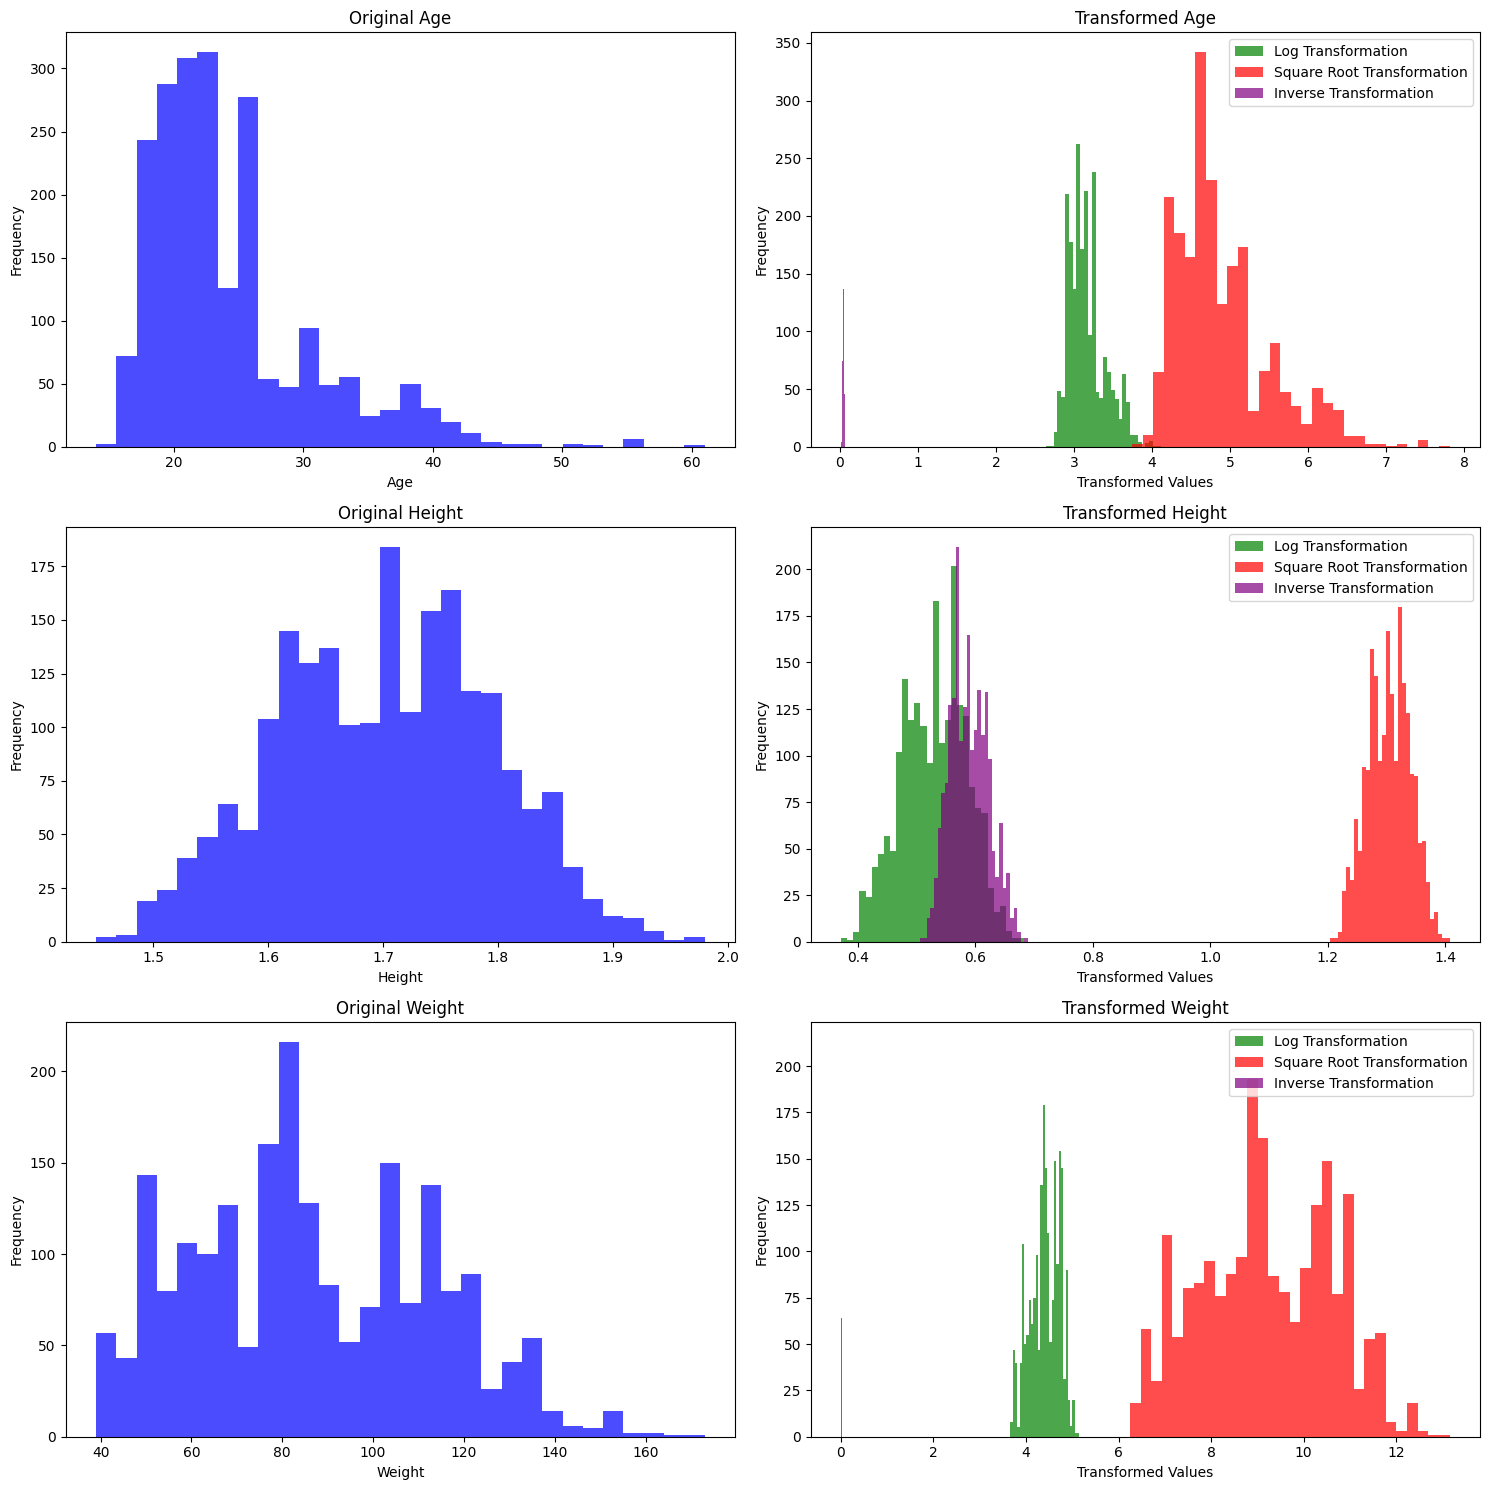

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Identify continuous attributes in the DataFrame to transform
continuous_columns = ['Age', 'Height', 'Weight']

# Set up the plot
plt.figure(figsize=(15, 5 * len(continuous_columns)))  # Adjust height based on number of continuous attributes

# Loop through each continuous attribute
for i, column in enumerate(continuous_columns):
    # Extract the data
    skewed_data = df[column].dropna()  # Drop NaN values for analysis

    # Plot the histogram of the original skewed data
    plt.subplot(len(continuous_columns), 2, i * 2 + 1)
    plt.hist(skewed_data, bins=30, color='blue', alpha=0.7)
    plt.title(f'Original {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Apply transformations
    log_transformed = np.log(skewed_data[skewed_data > 0])  # Log transformation requires positive values
    sqrt_transformed = np.sqrt(skewed_data)
    inverse_transformed = 1 / skewed_data

    # Plot histograms of transformed data
    plt.subplot(len(continuous_columns), 2, i * 2 + 2)
    plt.hist(log_transformed, bins=30, color='green', alpha=0.7, label='Log Transformation')
    plt.hist(sqrt_transformed, bins=30, color='red', alpha=0.7, label='Square Root Transformation')
    plt.hist(inverse_transformed, bins=30, color='purple', alpha=0.7, label='Inverse Transformation')
    plt.title(f'Transformed {column}')
    plt.xlabel('Transformed Values')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()




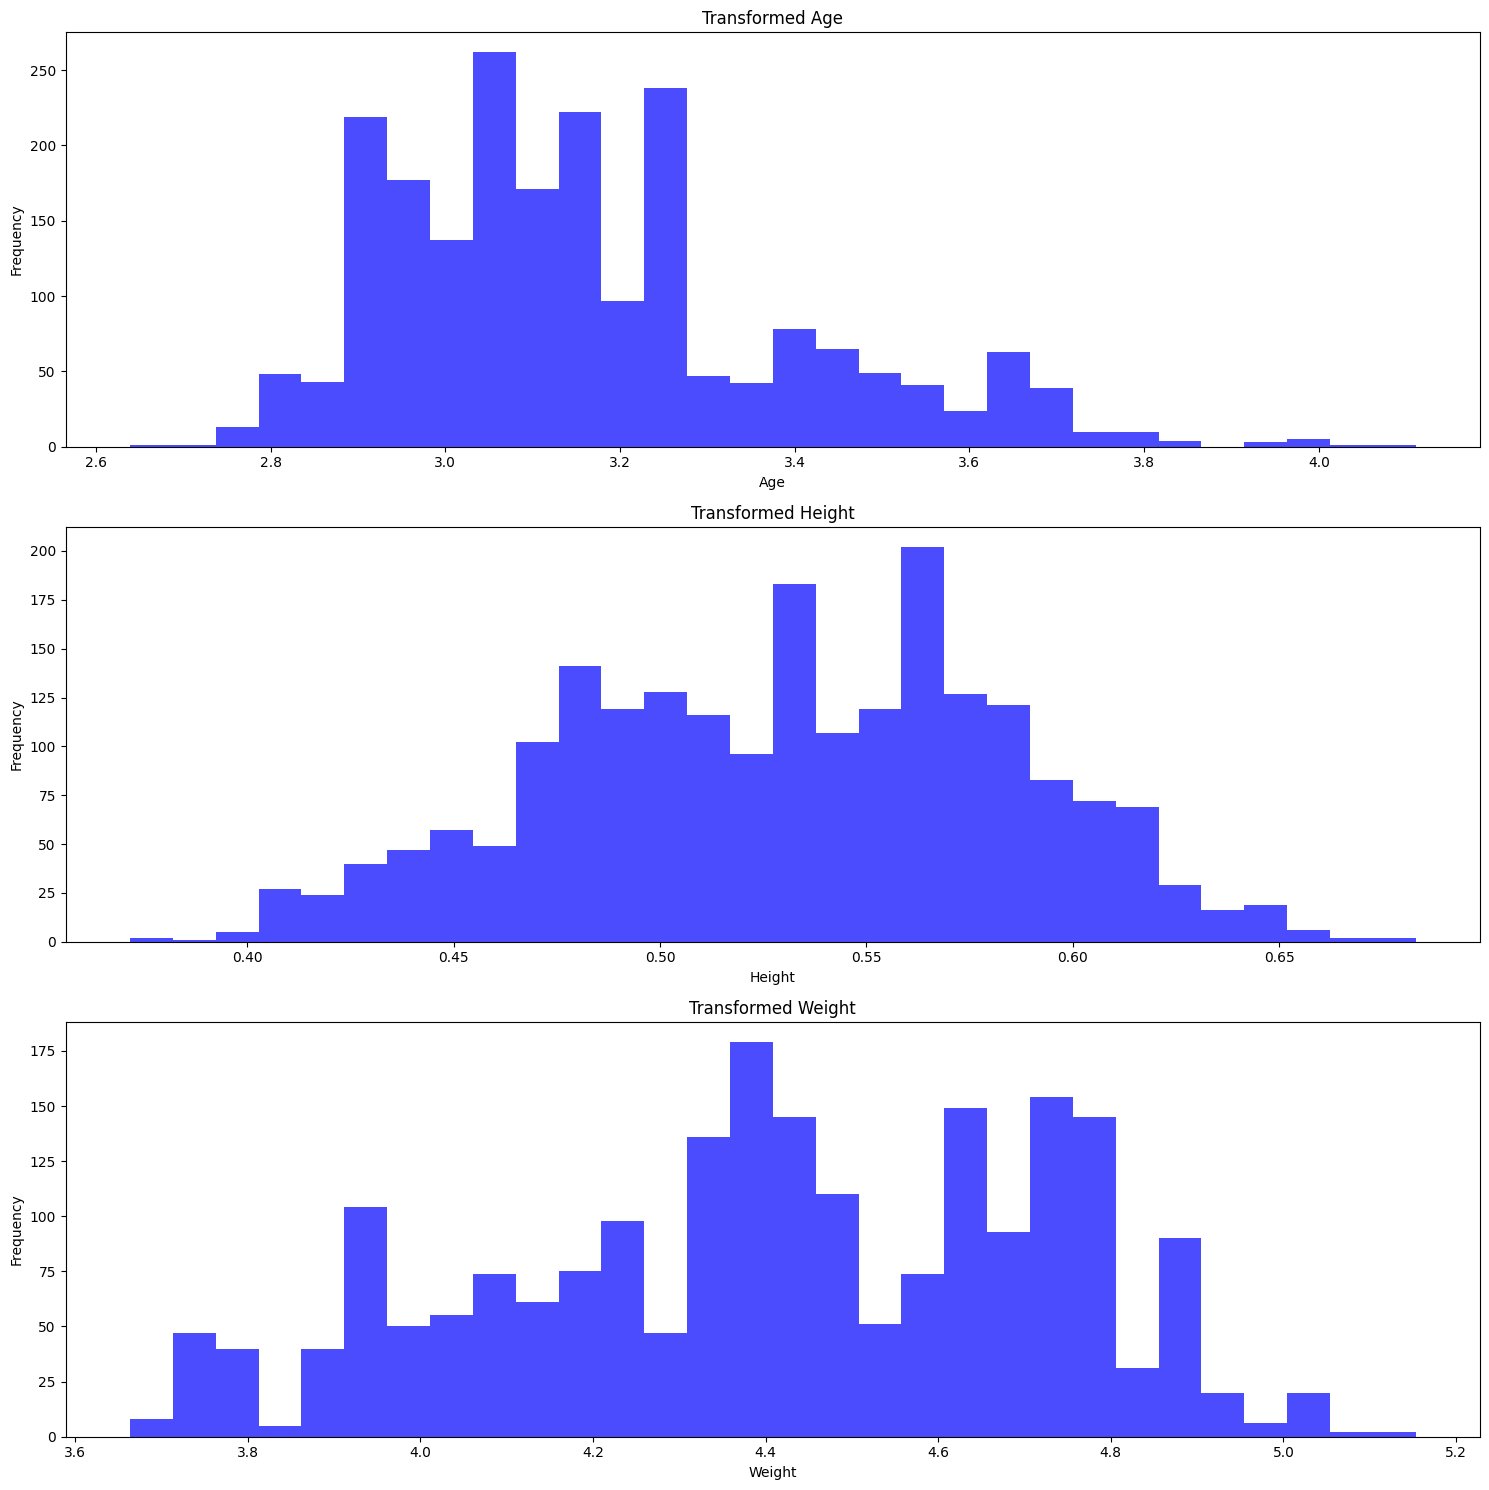

Transformed DataFrame:
        Age    Height    Weight
0  3.044522  0.482426  4.158883
1  3.044522  0.418710  4.025352
2  3.135494  0.587787  4.343805
3  3.295837  0.587787  4.465908
4  3.091042  0.576613  4.497585


In [12]:
#Based on the previous transformed data pick the best transformation technique for each feature
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#continuous_columns = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF']
#'NCP', 'CH2O', 'FAF' are technically categorical data. They are just decimals because some values of missing, they are replaced using some process of data imputation
continuous_columns = ['Age', 'Height', 'Weight']

# Create a new dictionary to store transformed data
transformed_data_dict = {}

for column in continuous_columns:
    data = df[column].dropna()  # Drop NaN values for analysis


    # Apply transformations based on the column
    if column != 'FAF':  # Apply log transformation for all except FAF
        data[df[column] > 0] = np.log(data[data > 0])  # Log transformation
    else:  # For FAF, apply square root transformation
      data = np.sqrt(df[column])  # Square root transformation directly

    # Store transformed data
    transformed_data_dict[column] = data

# Convert transformed features back to DataFrame
transformed_df = pd.DataFrame(transformed_data_dict)

# Plotting the transformed data
plt.figure(figsize=(15, 5 * len(transformed_df.columns)))  # Adjust height based on number of features

for i, column in enumerate(transformed_df.columns):
    plt.subplot(len(transformed_df.columns), 1, i + 1)
    plt.hist(transformed_df[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'Transformed {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Transformed DataFrame:")
print(transformed_df.head())


## **Outlier Analysis:**

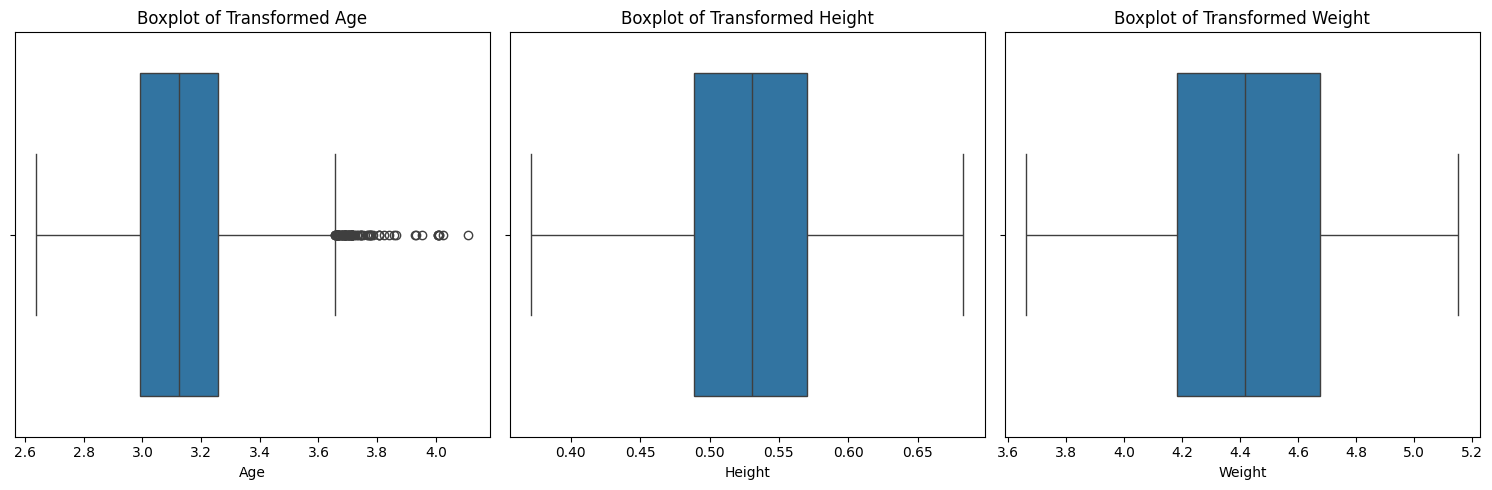

Rows with potential outliers in transformed data:
Age: 91
Height: 0
Weight: 0


,Age,Height,Weight
13,3.713572,0.587787,4.595120
21,3.951244,0.524729,4.465908
33,3.663562,0.582216,4.499810
92,4.007333,0.576613,4.430817
133,4.110874,0.500775,4.189655
...,...,...,...
1655,3.691530,0.565413,4.767723
1656,3.693225,0.567033,4.761956
1699,3.684510,0.534586,4.682248
1721,3.702894,0.558481,4.698285


Shape of DataFrame after removing outliers:
(2020, 3)
NaN counts after cleaning:
Gender                              0
Age                                 0
Height                              0
Weight                              0
FAVC                                0
FCVC                                0
NCP                                 0
CAEC                                0
SMOKE                               0
CH2O                                0
SCC                                 0
FAF                                 0
TUE                                 0
CALC                                0
NObeyesdad                          0
family_history_with_overweight_0    0
family_history_with_overweight_1    0
MTRANS_0                            0
MTRANS_1                            0
MTRANS_2                            0
MTRANS_3                            0
MTRANS_4                            0
dtype: int64


In [13]:
#OUTLIER:
# Convert selected columns to numeric if they are not already
transformed_columns = ['Age', 'Height', 'Weight']

# Plot boxplots for each numeric column to visually inspect for outliers
plt.figure(figsize=(15, 5))
for i, col in enumerate(transformed_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=transformed_df, x=col)
    plt.title(f'Boxplot of Transformed {col}')

plt.tight_layout()
plt.show()

# Calculate IQR for each numeric column
def find_outliers_iqr(data, columns):
    outliers = pd.DataFrame()
    outlier_counts = {}

    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Determine outliers
        outliers_in_col = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
        outliers = pd.concat([outliers, outliers_in_col])
        outlier_counts[col] = len(outliers_in_col)

    # Remove duplicate rows if an outlier is found in multiple columns
    outliers = outliers.drop_duplicates()
    return outliers, outlier_counts

# Detect outliers in transformed data
outlier_data, outlier_counts  = find_outliers_iqr(transformed_df, transformed_columns)

print("Rows with potential outliers in transformed data:")
for column, count in outlier_counts.items():
    print(f"{column}: {count}")
display(outlier_data)

# Remove outliers from transformed_df
df_transformed_no_outliers = transformed_df[~transformed_df.index.isin(outlier_data.index)]

print("Shape of DataFrame after removing outliers:")
print(df_transformed_no_outliers.shape)

# If other columns need to be included, merge transformed columns back with the rest of the dataset
df_final = df.copy()
df_final[transformed_columns] = df_transformed_no_outliers[transformed_columns]

# Drop rows with NaN values in the cleaned DataFrame
df_final = df_final.dropna(subset=transformed_columns)

print("NaN counts after cleaning:")
print(df_final.isna().sum())

# **Normalization for continuous features:**

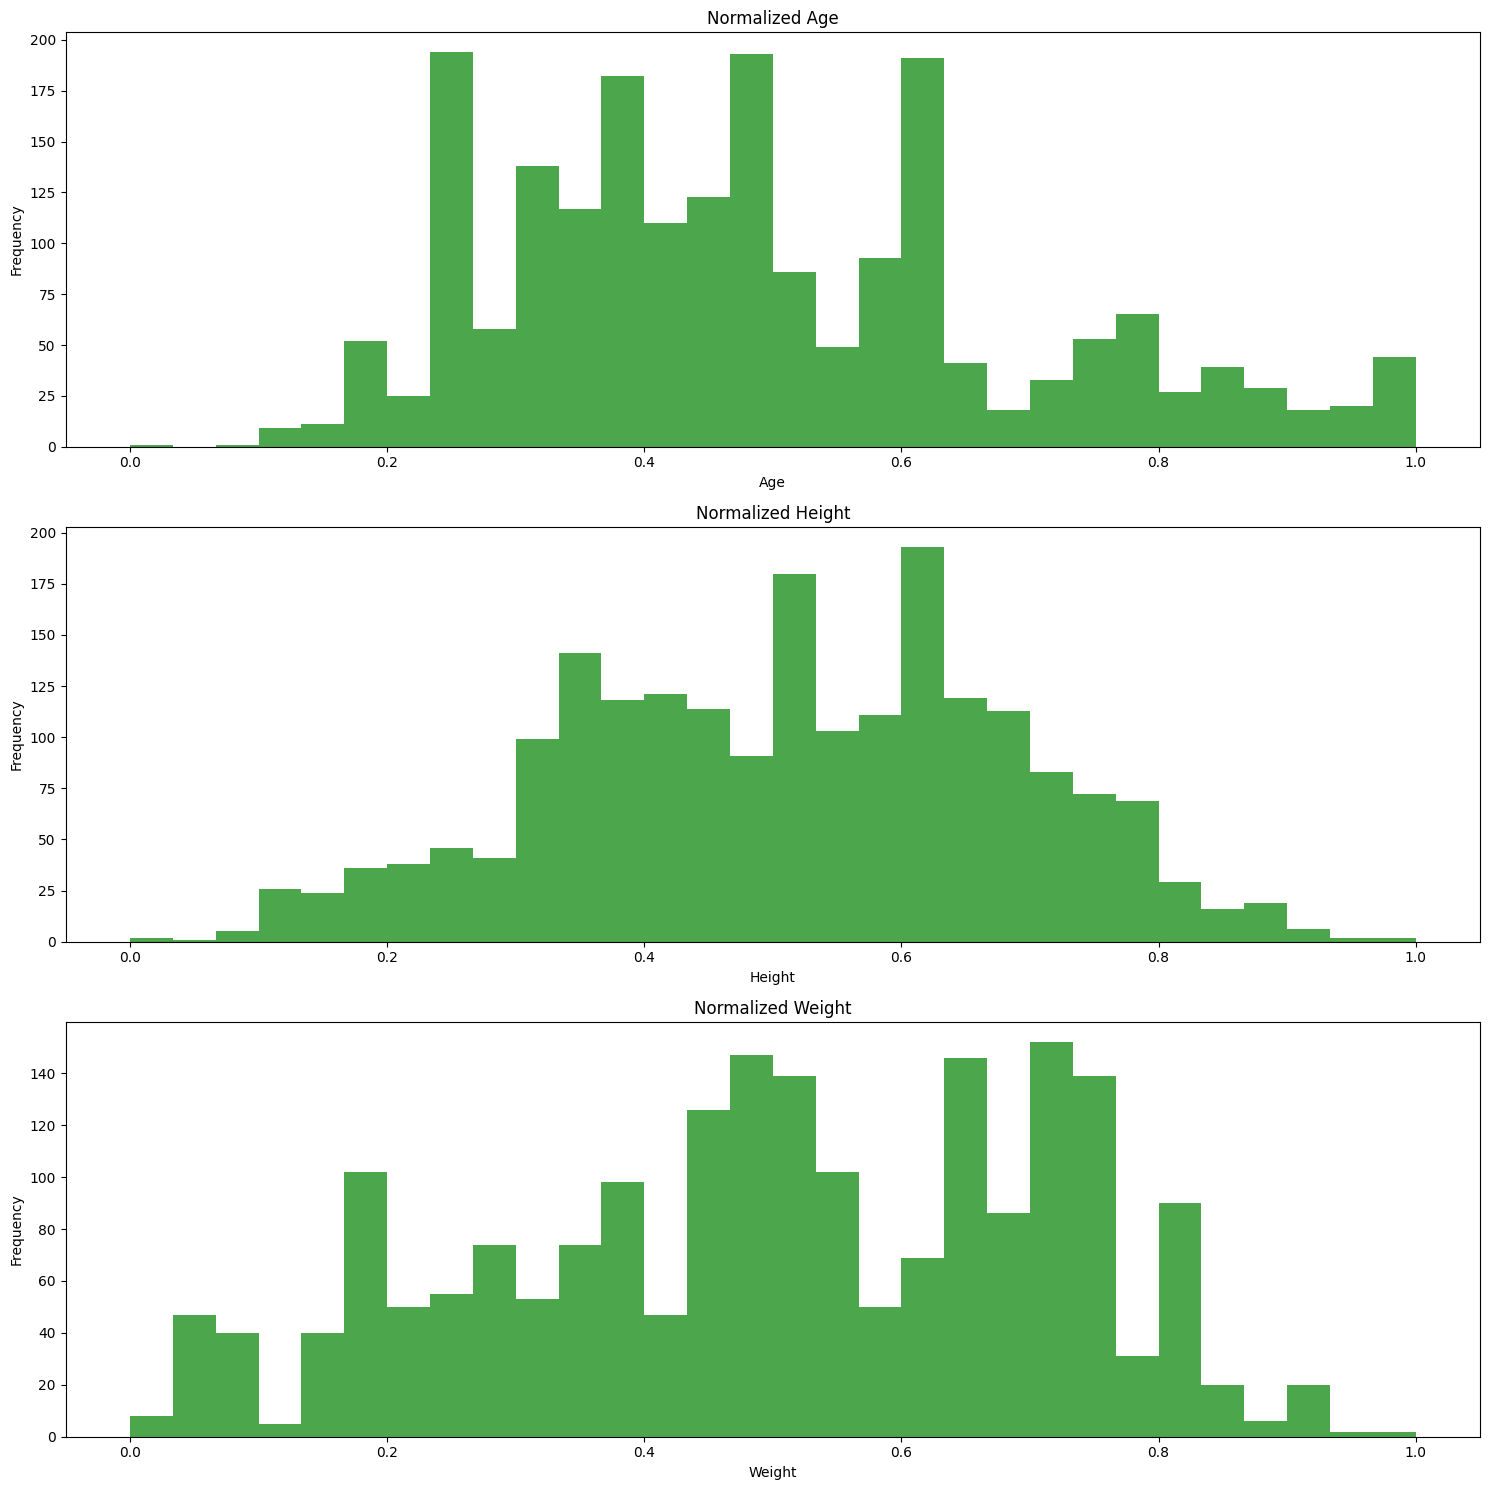

Normalized DataFrame:
   Gender       Age    Height    Weight  FAVC  FCVC  NCP  CAEC  SMOKE  CH2O  \
0       0  0.398937  0.355861  0.332491     0   2.0  3.0     1      0   2.0   
1       0  0.398937  0.151338  0.242856     0   3.0  3.0     1      1   3.0   
2       1  0.488444  0.694061  0.456622     0   2.0  3.0     1      0   2.0   
3       1  0.646205  0.694061  0.538585     0   3.0  3.0     1      0   2.0   
4       1  0.444708  0.658195  0.559849     0   2.0  1.0     1      0   2.0   

   ...  TUE  CALC  NObeyesdad  family_history_with_overweight_0  \
0  ...  1.0     0           1                               0.0   
1  ...  0.0     1           1                               0.0   
2  ...  1.0     2           1                               0.0   
3  ...  0.0     2           2                               1.0   
4  ...  0.0     1           3                               1.0   

   family_history_with_overweight_1  MTRANS_0  MTRANS_1  MTRANS_2  MTRANS_3  \
0                    

In [14]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Define the columns to normalize
columns_to_normalize = transformed_df.columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the columns in df_final
df_final[columns_to_normalize] = scaler.fit_transform(df_final[columns_to_normalize])

# Plotting normalized data
plt.figure(figsize=(15, 5 * len(columns_to_normalize)))  # Adjust height based on number of features

for i, column in enumerate(columns_to_normalize):
    plt.subplot(len(columns_to_normalize), 1, i + 1)
    plt.hist(df_final[column], bins=30, color='green', alpha=0.7)
    plt.title(f'Normalized {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print the normalized DataFrame to verify
print("Normalized DataFrame:")
print(df_final.head())

print(f"Scale: {scaler.scale_}")  # Scale factor
print(f"Min: {scaler.min_}")      # Min added after scaling
print(f"Data Min: {scaler.data_min_}")  # Original feature-wise minimum
print(f"Data Max: {scaler.data_max_}")  # Original feature-wise maximum


In [15]:
#Splitting data using test_train_split()
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(df_final.drop("NObeyesdad", axis=1), df_final["NObeyesdad"], test_size=0.2, random_state=42)

# Multi-class logistic regression- Ethan

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1200 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1267, in fit
    multi_class = _check_multi_class(multi_class, solver, len(self.clas

Best Parameters: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score Model Data:


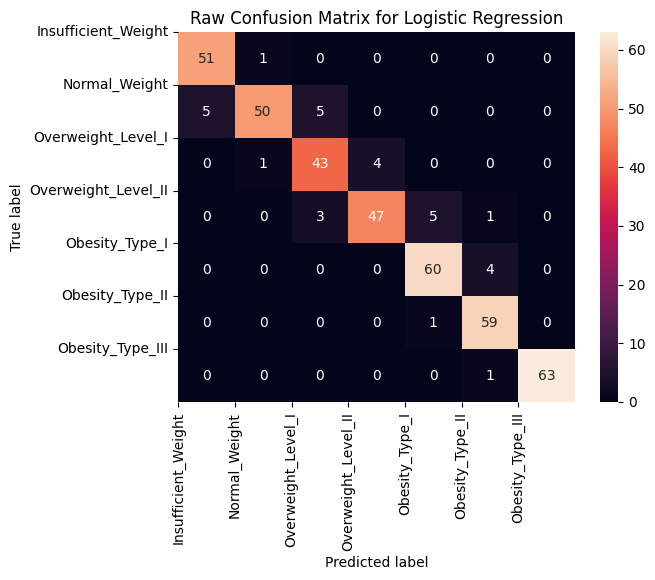

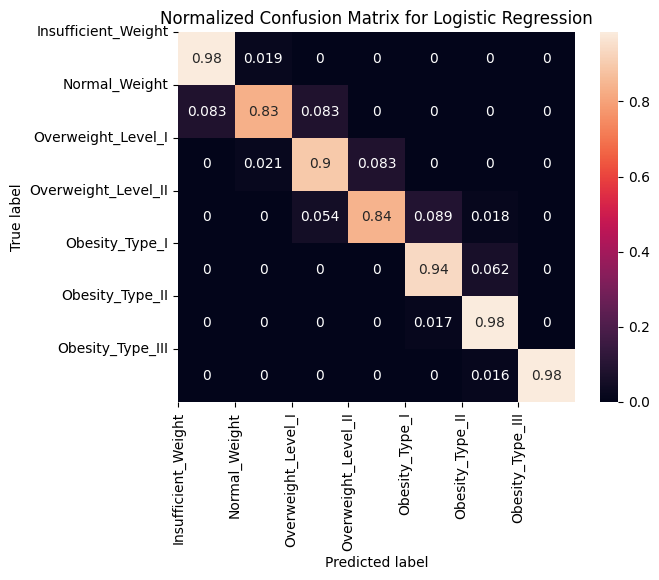

Training score: 0.9443069306930693
Testing score: 0.9232673267326733
Accuracy: 92.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.96      0.83      0.89        60
           2       0.84      0.90      0.87        48
           3       0.92      0.84      0.88        56
           4       0.91      0.94      0.92        64
           5       0.91      0.98      0.94        60
           6       1.00      0.98      0.99        64

    accuracy                           0.92       404
   macro avg       0.92      0.92      0.92       404
weighted avg       0.93      0.92      0.92       404



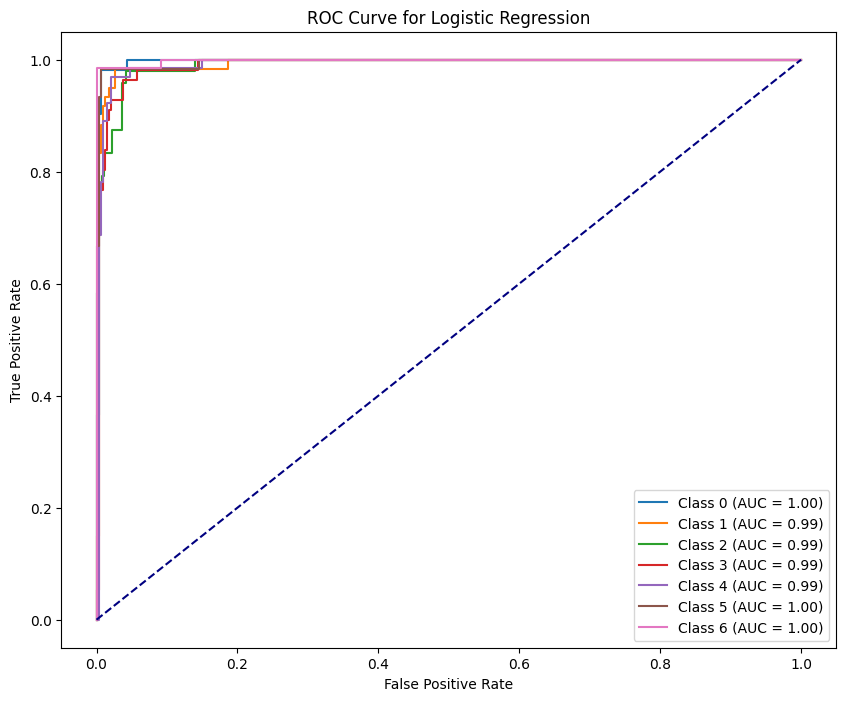

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
!pip install xgboost
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


import warnings
from sklearn.exceptions import ConvergenceWarning

#Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


#Create the model
logistic_regression = LogisticRegression(multi_class='multinomial')

param = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],
    'max_iter': [100, 500, 1000]
}

#Grid Search Hyperparameter Tuning
grid_search = GridSearchCV(
    estimator=logistic_regression,
    param_grid=param,
    scoring='accuracy',
    cv=10,  # 10-fold cross-validation
    #n_jobs=-1,
    verbose=1
)

#Fit model
grid_search.fit(X_train, y_train)

#Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

#What is the best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Score Model Data:")

#Define laels for confusion matrix visuals
labels = list(nobeyesdad_mapping.keys())

#Compute the raw confusion matrix
logistic_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(logistic_matrix, annot=True)
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Raw Confusion Matrix for Logistic Regression")

plt.show()
print("")

#Compute the normalized confusion matrix
logistic_matrix = confusion_matrix(y_test, y_pred, normalize = 'true')

sns.heatmap(logistic_matrix, annot=True)
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Normalized Confusion Matrix for Logistic Regression")

plt.show()

#Print raw accuracy scores:
print('Training score:', best_model.score(X_train, y_train))
print('Testing score:', best_model.score(X_test, y_test))

# Print accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

#Plot ROC curve:
y_pred_prob = best_model.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

#Plot
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

#labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")

plt.show()

# Tree-based methods (Random Forest) - Eddie

RandomForestClassifier(max_features=None, n_estimators=150)
Best cross-validation accuracy: 0.957
{'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'n_estimators': 150}


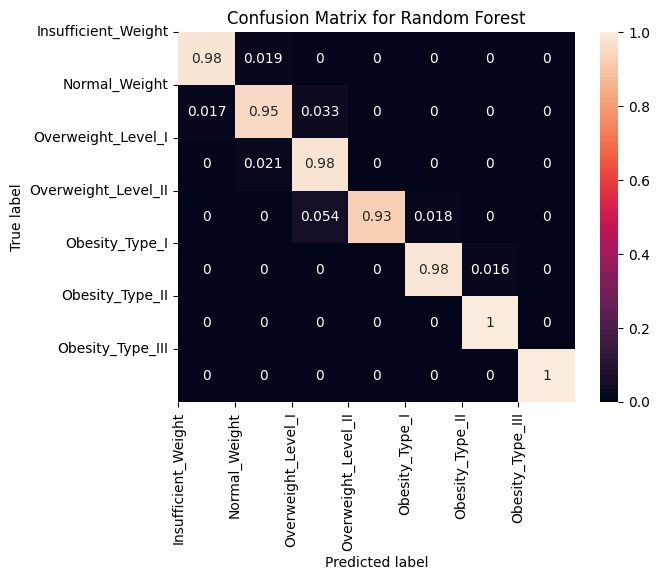

Accuracy: 92.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.96      0.83      0.89        60
           2       0.84      0.90      0.87        48
           3       0.92      0.84      0.88        56
           4       0.91      0.94      0.92        64
           5       0.91      0.98      0.94        60
           6       1.00      0.98      0.99        64

    accuracy                           0.92       404
   macro avg       0.92      0.92      0.92       404
weighted avg       0.93      0.92      0.92       404



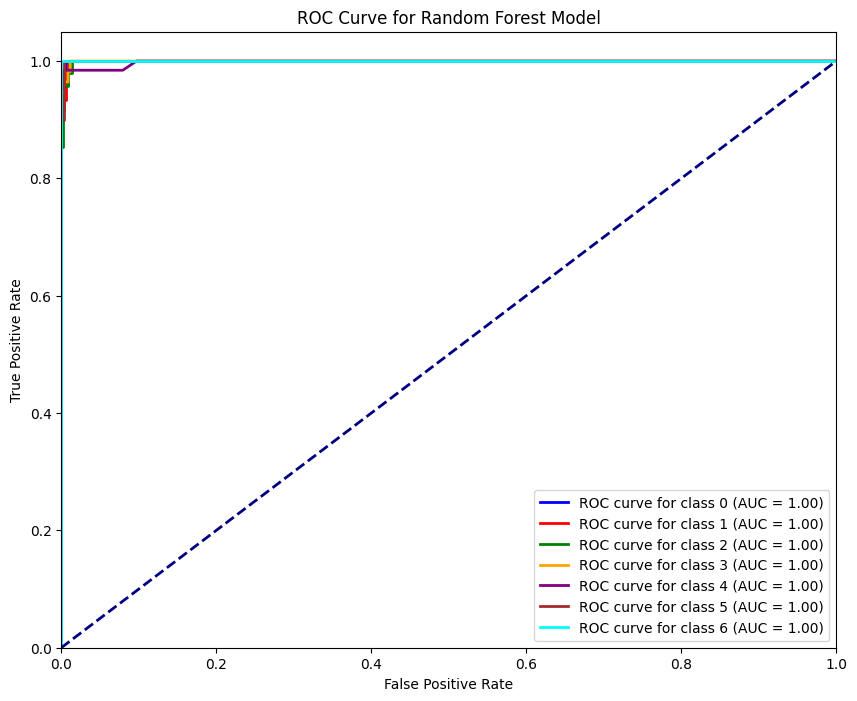

Training Accuracy: 100.00%
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       229
           3       1.00      1.00      1.00       212
           4       1.00      1.00      1.00       249
           5       1.00      1.00      1.00       222
           6       1.00      1.00      1.00       260

    accuracy                           1.00      1616
   macro avg       1.00      1.00      1.00      1616
weighted avg       1.00      1.00      1.00      1616

Test Accuracy: 92.33%
No significant overfitting detected.


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

param_grid = {
    'n_estimators': [50,100,150],
    'max_features': ['sqrt', 'log2',None],
    'max_depth': [9,12,15,None],
    'max_leaf_nodes':[9,12,15,None],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.3f}")
print(grid_search.best_params_)
forest = grid_search.best_estimator_
forest_matrix = confusion_matrix(y_test, forest.predict(X_test))
forest_matrix = forest_matrix.astype('float') / forest_matrix.sum(axis=1)[:, np.newaxis] #Normalises matrix
labels = list(nobeyesdad_mapping.keys())
best_model = grid_search.best_estimator_

sns.heatmap(forest_matrix, annot=True)
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Print accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=np.unique(y_test).astype(str)))

# Compute ROC and AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = forest.predict_proba(X_test)
n_classes = y_test_binarized.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"ROC curve for class {i} (AUC = {roc_auc[i]:.2f})")

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], color="navy", linestyle="--", lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Model")
plt.legend(loc="lower right")
plt.show()

# Evaluate on the training set
y_train_pred = forest.predict(X_train)

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

train_classification_report = classification_report(y_train, y_train_pred, target_names=np.unique(y_test).astype(str))
print("Training Classification Report:")
print(train_classification_report)

# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Overfitting Analysis
if train_accuracy - test_accuracy > 0.1:  # 10% threshold, adjust as needed
    print("Potential overfitting detected: High training accuracy but lower test accuracy.")
else:
    print("No significant overfitting detected.")

# Gradient Boosting - Thinh

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found by GridSearchCV:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}


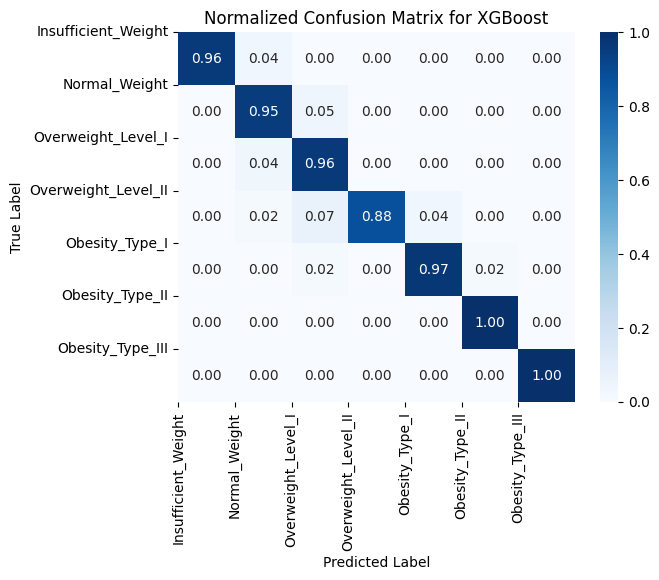

Accuracy: 96.04%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.92      0.95      0.93        60
           2       0.85      0.96      0.90        48
           3       1.00      0.88      0.93        56
           4       0.97      0.97      0.97        64
           5       0.98      1.00      0.99        60
           6       1.00      1.00      1.00        64

    accuracy                           0.96       404
   macro avg       0.96      0.96      0.96       404
weighted avg       0.96      0.96      0.96       404



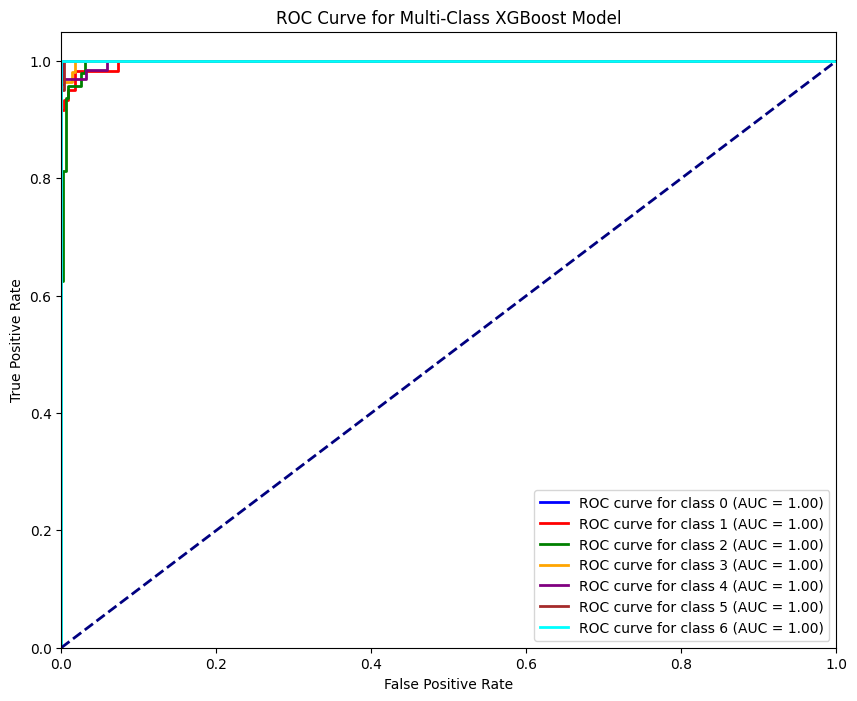

Training Accuracy: 100.00%
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       229
           3       1.00      1.00      1.00       212
           4       1.00      1.00      1.00       249
           5       1.00      1.00      1.00       222
           6       1.00      1.00      1.00       260

    accuracy                           1.00      1616
   macro avg       1.00      1.00      1.00      1616
weighted avg       1.00      1.00      1.00      1616

Test Accuracy: 96.04%
No significant overfitting detected.


In [19]:

# Define the parameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  #for step size
    'max_depth': [3, 6, 10], #for tree complexity
    'n_estimators': [50, 100, 200], #number of boosting rounds
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Train the XGBoost model
xgb_clf = xgb.XGBClassifier(objective='multi:softprob', num_class=len(y_train.unique()), random_state=42)

# Use GridSearchCV to search over the hyperparameter grid
grid_search = GridSearchCV(xgb_clf, xgb_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters from GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Train the model with the best parameters
best_xgb_clf = grid_search.best_estimator_

# Make predictions
y_pred = best_xgb_clf.predict(X_test)

# Compute the confusion matrix and normalize it
xgb_matrix = confusion_matrix(y_test, y_pred)
xgb_matrix_normalized = xgb_matrix.astype('float') / xgb_matrix.sum(axis=1)[:, np.newaxis]

# Plot the normalized confusion matrix
sns.heatmap(xgb_matrix_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Normalized Confusion Matrix for XGBoost")
plt.show()

# Print accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=np.unique(y_test).astype(str)))

# Compute ROC and AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = best_xgb_clf.predict_proba(X_test)
n_classes = y_test_binarized.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"ROC curve for class {i} (AUC = {roc_auc[i]:.2f})")

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], color="navy", linestyle="--", lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class XGBoost Model")
plt.legend(loc="lower right")
plt.show()

# Evaluate on the training set
y_train_pred = best_xgb_clf.predict(X_train)

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

train_classification_report = classification_report(y_train, y_train_pred, target_names=np.unique(y_test).astype(str))
print("Training Classification Report:")
print(train_classification_report)

# Evaluate on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Overfitting Analysis
if train_accuracy - test_accuracy > 0.1:  # 10% threshold, adjust as needed
    print("Potential overfitting detected: High training accuracy but lower test accuracy.")
else:
    print("No significant overfitting detected.")


# K-nearest-neighbor - Brandon

Best parameters: {'metric': 'minkowski', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best cross-validation accuracy: 0.786


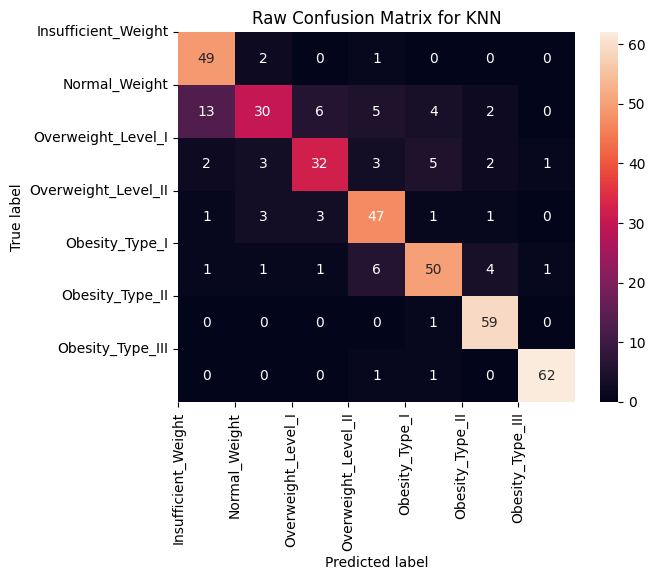

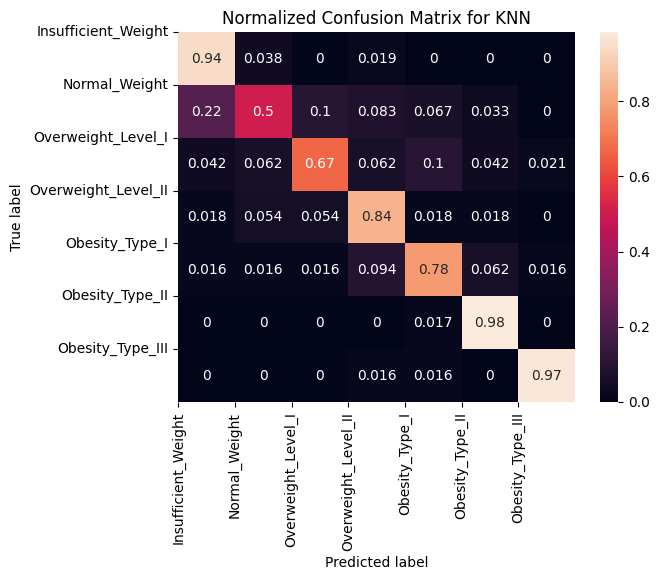

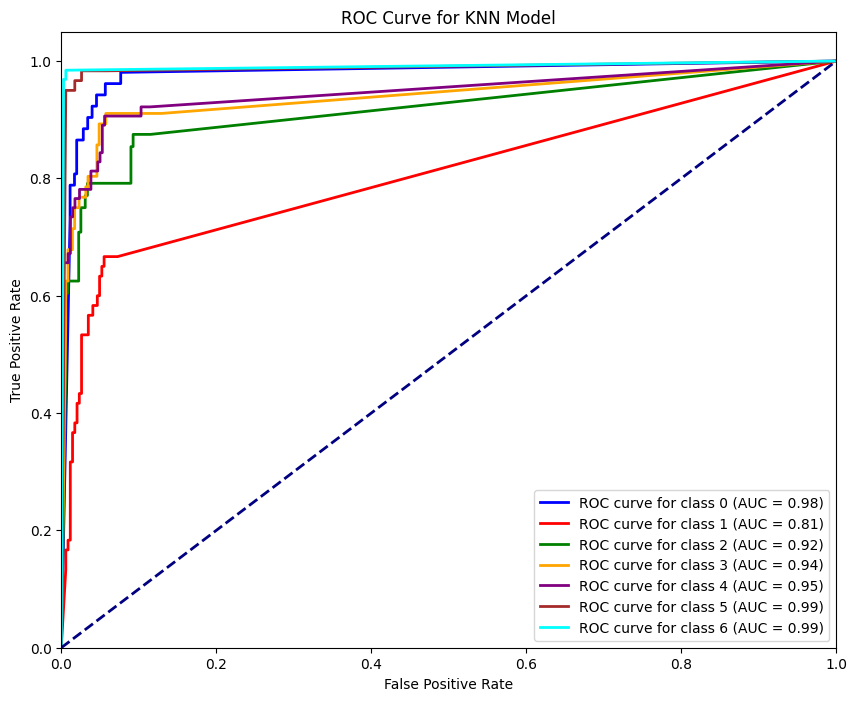

Training score: 1.0
Testing score: 0.8143564356435643
Accuracy: 81.44%
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        52
           1       0.77      0.50      0.61        60
           2       0.76      0.67      0.71        48
           3       0.75      0.84      0.79        56
           4       0.81      0.78      0.79        64
           5       0.87      0.98      0.92        60
           6       0.97      0.97      0.97        64

    accuracy                           0.81       404
   macro avg       0.81      0.81      0.80       404
weighted avg       0.81      0.81      0.81       404



In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]  # Only relevant if 'minkowski' is used
}

# Initialize the GridSearchCV object with KNN
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#  the best parameters and model
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.3f}")

# Assign the best model for further evaluation
best_k = grid_search.best_params_['n_neighbors']
best_knn = grid_search.best_estimator_


y_pred = best_knn.predict(X_test)

#Define laels for confusion matrix visuals
labels = list(nobeyesdad_mapping.keys())

#Compute the raw confusion matrix
KNN_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(KNN_matrix, annot=True)
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Raw Confusion Matrix for KNN")

plt.show()
print("")

#Compute the normalized confusion matrix
KNN_matrix = confusion_matrix(y_test, y_pred, normalize = 'true')

sns.heatmap(KNN_matrix, annot=True)
plt.xticks(np.arange(len(labels)), labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Normalized Confusion Matrix for KNN")

plt.show()




# Compute ROC and AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = best_knn.predict_proba(X_test)
n_classes = y_test_binarized.shape[1]

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'cyan']  # Extend or adjust colors if necessary
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"ROC curve for class {i} (AUC = {roc_auc[i]:.2f})")

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], color="navy", linestyle="--", lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN Model")
plt.legend(loc="lower right")
plt.show()

#Print raw accuracy scores:
print('Training score:', best_knn.score(X_train, y_train))
print('Testing score:', best_knn.score(X_test, y_test))


# Print accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))



In [22]:
param_grid = {
    'n_estimators': [50,100,150],
    'max_features': ['sqrt', 'log2',None],
    'max_depth': [9,12,15,None],
    'max_leaf_nodes':[9,12,15,None],
}


X_train, X_test, y_train, y_test = train_test_split(df.drop("NObeyesdad", axis=1), df["NObeyesdad"], test_size=0.2, random_state=42)
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 12, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [9, 12, 15, None],
                         'n_estimators': [50, 100, 150]})

In [23]:
best_model = grid_search.best_estimator_
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)